# General Overview

For a general motivation, we load two equities in the Energy sector - CVX (Chevron Mobile) and CTRA (Coterra Energy). We can let CVX assume the spot as a sector leader since, 
$$
\text{MarketCap(CVX)}>\text{MarketCap(CTRA)}
$$.

With a very basic plot, we can get an idea of their prices move with relation to one another. More importantly, we focus on how a sector follower equity performs alongside a leader; how does CTRA perform in relation to CVX on an intraday basis? 

We start by fetching the prices of both equities, and performing an index scale to scale both series of prices to some $p \in \mathbb{R}$, which we will leave as the standard $p=100$.

In [ ]:
from priceable import *

L = Priceable(ticker="CVX")
F = Priceable(ticker="CTRA")

# prices() method uses a standard value for period lookback and interval of quotes as 1d and 1m respectively.
L_raw_prices = L.prices().rename("CVX Raw Prices")
F_raw_prices = F.prices().rename("CTRA Raw Prices")

# example series output
print(L_raw_prices)

Datetime
2025-09-19 09:30:00-04:00    158.330002
2025-09-19 09:31:00-04:00    157.979996
2025-09-19 09:32:00-04:00    157.720001
2025-09-19 09:33:00-04:00    157.619995
2025-09-19 09:34:00-04:00    157.485001
                                ...    
2025-09-19 15:55:00-04:00    156.259995
2025-09-19 15:56:00-04:00    156.169998
2025-09-19 15:57:00-04:00    156.169907
2025-09-19 15:58:00-04:00    156.100006
2025-09-19 15:59:00-04:00    156.149994
Name: CVX Raw Prices, Length: 390, dtype: float64


Before scaling, it is quite hard to conclude anything about CVX-CTRA comovement:

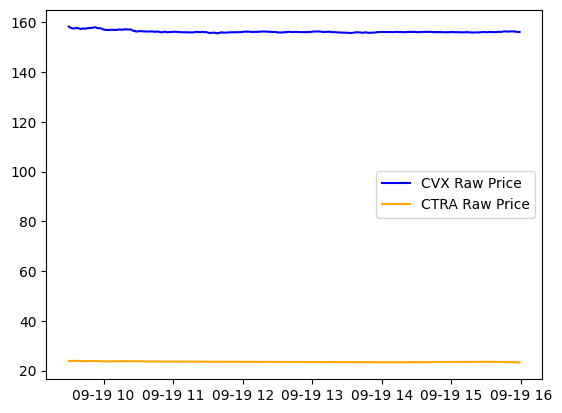

In [11]:
import matplotlib.pyplot as plt

plt.plot(L_raw_prices, color='blue', label='CVX Raw Price')
plt.plot(F_raw_prices, color='orange', label='CTRA Raw Price')
plt.legend()
plt.show()

But as we scale using an index scale $\phi : \mathbb{R} \to \mathbb{R_{>0}}$ defined as, 

$$
\phi(t) = \frac{P(t)}{P(t_0)} \cdot p = \frac{P(t)}{P(t_0)} \cdot 100
$$

We can get a closer look at their comovement.


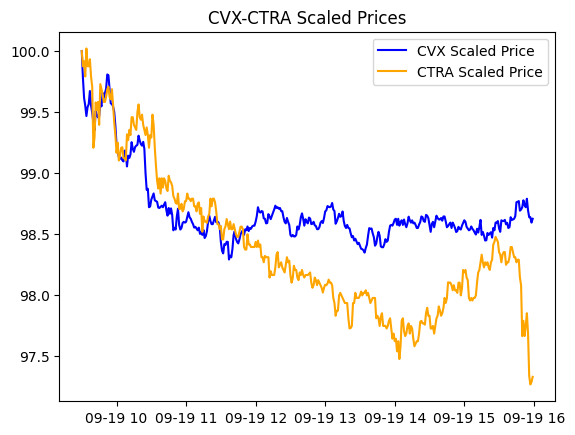

In [14]:
from series_algebra import *

p = 100
L_scaled = scale(L_raw_prices, initial=p)
F_scaled = scale(F_raw_prices, initial=p)

plt.clf()
plt.plot(L_scaled, color='blue', label='CVX Scaled Price')
plt.plot(F_scaled, color='orange', label='CTRA Scaled Price')
plt.legend()
plt.title("CVX-CTRA Scaled Prices")
plt.show()

From the scaled prices, we can make a few remarks about where divergence occurs, but let us plot the difference $\phi(L)-\phi(F)$ over the same $X$ axis is a subplot. From this plot, we can get a better sense of when $\phi(L)-\phi(F)$ increases, reaches a maximum, and how long it takes until $\phi(L)$ and $\phi(F)$ re-enter a non-divergent state.

<Figure size 640x480 with 0 Axes>

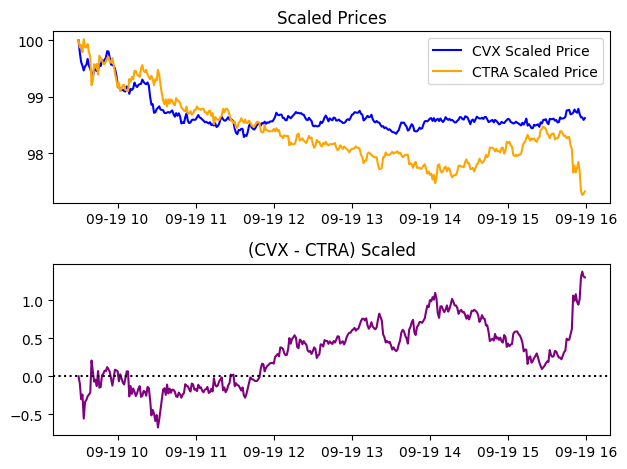

In [ ]:
LF_diff = difference(first=L_scaled, second=F_scaled)
plt.clf()

fig, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(L_scaled, color='blue', label='CVX Scaled Price')
ax0.plot(F_scaled, color='orange', label='CTRA Scaled Price')
ax0.legend()
ax0.set_title("Scaled Prices")

ax1.plot(LF_diff, color='purple')
ax1.set_title("(CVX - CTRA) Scaled")

# add y=0 line
ax1.axhline(y=0, color='black', linestyle=':')

plt.tight_layout()
plt.show()
